In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
root_path = '/content/gdrive/My Drive/Multi_Task_Learning/PangLee/'

In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [4]:
sentiment = pd.read_csv(root_path + "Dataset/Polarity_data/sentiment_10k.csv")

In [5]:
subjective = pd.read_csv(root_path + "Dataset/Subjective_data/subjectivity.csv")

In [6]:
sentiment = sentiment[["text", "pos", "neg"]]

In [7]:
subjective = subjective[["text", "sub", "obj"]]

In [8]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [9]:
sentiment_data = []

for sen in sentiment.text.values:
    sentiment_data.append(str(sen))

In [10]:
subjective_data = []

for sen in subjective.text.values:
    subjective_data.append(str(sen))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
senti_train, senti_test, sentlabel_train, sentlabel_test = train_test_split(sentiment_data, sentiment[["pos", "neg"]], test_size=0.20, random_state=42)

In [13]:
sub_train, sub_test, sublabel_train, sublabel_test = train_test_split(subjective_data,subjective[["sub", "obj"]], test_size=0.20, random_state=42)

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [15]:
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(senti_train)

senti_train = tokenizer.texts_to_sequences(list(senti_train))
senti_test = tokenizer.texts_to_sequences(senti_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 45

senti_train = pad_sequences(senti_train, padding='post', maxlen=maxlen)
senti_test = pad_sequences(senti_test, padding='post', maxlen=maxlen)

In [16]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open("/content/gdrive/My Drive/NTU Project/Glove/glove.6B.300d.txt",encoding="utf8")


for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [17]:
sentiment_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        sentiment_matrix[index] = embedding_vector

In [18]:
sentiment_matrix.shape

(15845, 300)

In [ ]:
# import pickle

In [ ]:
# with open('/content/gdrive/My Drive/Multi_Task_Learning/PangLee/polarity_data/sentiment_emb.pkl','wb') as f:
#   pickle.dump(sentiment_matrix, f)

In [19]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sub_train)

sub_train = tokenizer.texts_to_sequences(list(sub_train))
sub_test = tokenizer.texts_to_sequences(sub_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 45

sub_train = pad_sequences(sub_train, padding='post', maxlen=maxlen)
sub_test = pad_sequences(sub_test, padding='post', maxlen=maxlen)

In [20]:
subjective_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        subjective_matrix[index] = embedding_vector

In [21]:
subjective_matrix.shape

(18644, 300)

In [ ]:
# with open('/content/gdrive/My Drive/Multi_Task_Learning/PangLee/rotten_imdb/subjective_emb.pkl','wb') as f:
#   pickle.dump(subjective_matrix, f)

In [22]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=5203c56ff142d201eaeec05063bf6b0f52962625ee1b8fe17977b5fa996a5f72
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [23]:
import sys
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import io
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import csv
from keras.layers import Input
from keras.layers.merge import Concatenate
import scipy.stats as stats
from keras import backend as K
from keras.layers.core import Lambda
from keras.engine.topology import Layer
from keras.models import Sequential
from keras.layers import Input,Dense,GRU,LSTM,Concatenate,Dropout,Activation,Add, Masking, Concatenate, Dot, RepeatVector, Permute, Multiply, Dense
from keras.layers.pooling import AveragePooling1D,MaxPooling1D
from keras.layers.core import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D
from keras.models import Model
from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.layers.core import Reshape
from keras.backend import shape
from keras.utils import plot_model
from keras.layers.merge import Multiply,Concatenate
from keras.optimizers import RMSprop,Adadelta,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, Dropout, add, concatenate
from keras.layers import  Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.preprocessing import text, sequence
from keras.losses import binary_crossentropy
from keras import backend as K
import keras.layers as L
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import Adam
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from keras.layers import Layer
import keras.backend as K
from keras.utils import plot_model
from keras_self_attention import SeqSelfAttention

In [24]:
class NeuralTensorLayer(Layer):

  def __init__(self, output_dim, input_dim=None, **kwargs):
    self.output_dim = output_dim #k
    self.input_dim = input_dim   #d
    if self.input_dim:
      kwargs['input_shape'] = (self.input_dim,)
    super(NeuralTensorLayer, self).__init__(**kwargs)

  def build(self, input_shape):
    mean = 0.0
    std = 1.0
    # W : k*d*d
    k = self.output_dim
    d = self.input_dim
    initial_W_values = stats.truncnorm.rvs(-2 * std, 2 * std, loc=mean, scale=std, size=(k,d,d))
    initial_V_values = stats.truncnorm.rvs(-2 * std, 2 * std, loc=mean, scale=std, size=(2*d,k))
    self.W = K.variable(initial_W_values)
    self.V = K.variable(initial_V_values)
    self.b = K.zeros((self.input_dim,))
    self.trainable_weights = [self.W, self.V, self.b]

  def call(self, inputs, mask=None):
    if type(inputs) is not list or len(inputs) <= 1:
      raise Exception('BilinearTensorLayer must be called on a list of tensors '
                      '(at least 2). Got: ' + str(inputs))
    e1 = inputs[0]
    e2 = inputs[1]
    batch_size = K.shape(e1)[0]
    k = self.output_dim

    feed_forward_product = K.dot(K.concatenate([e1,e2], axis=1), self.V)
    bilinear_tensor_products = []
    for i in range(k):
      btp = K.sum((e2 * K.dot(e1, self.W[i])) + self.b, axis=1)
      bilinear_tensor_products.append(btp)
    result = K.tanh(K.reshape(K.concatenate(bilinear_tensor_products, axis=0), (batch_size, k)) + feed_forward_product)
    return result

  def compute_output_shape(self, input_shape):
    batch_size = input_shape[0][0]
    return (batch_size, self.output_dim)


In [28]:
import keras

In [ ]:
###Multi task Model
deep_inputs_1 = Input(shape=(maxlen,))
deep_inputs_2 = Input(shape=(maxlen,))

embedding_layer_1 = Embedding(15845, 300, weights=[sentiment_matrix], trainable=False)(deep_inputs_1) #task 1
embedding_layer_2 = Embedding(18644, 300, weights=[subjective_matrix], trainable=False)(deep_inputs_2) #task 2

model_1_LSTM = Bidirectional(LSTM(128,return_sequences=True,dropout=0.2,recurrent_dropout=0.3))(embedding_layer_1 ) #task 1
model_2_LSTM = Bidirectional(LSTM(128,return_sequences=True,dropout=0.2,recurrent_dropout=0.3))(embedding_layer_2) #task 2

model_1_dense= TimeDistributed(Dense(128,activation='relu',trainable=True))(model_1_LSTM)
model_2_dense=TimeDistributed(Dense(128,activation='relu',trainable=True))(model_2_LSTM)

model_1_dense = Dropout(0.5)(model_1_dense)
model_2_dense = Dropout(0.5)(model_2_dense)

attention_layer_1 = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
                       kernel_regularizer=keras.regularizers.l2(1e-4),
                       bias_regularizer=keras.regularizers.l1(1e-4),
                       attention_regularizer_weight=1e-4,
                       attention_activation='sigmoid')(model_1_dense) ###ERROR
attention_layer_2 = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
                       kernel_regularizer=keras.regularizers.l2(1e-4),
                       bias_regularizer=keras.regularizers.l1(1e-4),
                       attention_regularizer_weight=1e-4,
                       attention_activation='sigmoid')(model_2_dense)


model_12_dense =Dense(10,activation='relu',trainable=True)(attention_layer_1)
model_22_dense =Dense(10,activation='relu',trainable=True)(attention_layer_2)

drop_3 = Dropout(0.5)(model_12_dense)
drop_4 = Dropout(0.5)(model_22_dense)

flat_1 = Flatten()(drop_3)
flat_2 = Flatten()(drop_4)

ntn_output = NeuralTensorLayer(output_dim=64, input_dim=450)([flat_1,flat_2])

flat_11 = Dense(50, activation='relu')(flat_1)
flat_22 = Dense(50, activation='relu')(flat_2)

merged_1 = Concatenate(axis=1)([flat_11, ntn_output])
merged_2=Concatenate(axis=1)([flat_22, ntn_output])

predictions1 = Dense(2, activation='softmax')(merged_1 ) 
predictions2 = Dense(2, activation='softmax')(merged_2)

model = Model(inputs=[deep_inputs_1, deep_inputs_2], outputs=[predictions1, predictions2])

opt = Adam(learning_rate=0.0002)
# opt =SGD(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

model.summary()


In [26]:
from keras.utils import plot_model
plot_model(model)#, to_file='/content/gdrive/My Drive/Multi_Task_Learning/PangLee/model2.png')

NameError: ignored

In [ ]:
history=model.fit([senti_train, sub_train], [sentlabel_train,sublabel_train], batch_size= 64, epochs=20, verbose=1, shuffle=True,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 185s 29ms/step - loss: 1.0343 - dense_5_loss: 0.5499 - dense_6_loss: 0.4844 - dense_5_acc: 0.7453 - dense_6_acc: 0.7937 - val_loss: 0.6545 - val_dense_5_loss: 0.3597 - val_dense_6_loss: 0.2947 - val_dense_5_acc: 0.8894 - val_dense_6_acc: 0.8906
Epoch 2/20
6400/6400 [==============================] - 177s 28ms/step - loss: 0.6587 - dense_5_loss: 0.3561 - dense_6_loss: 0.3026 - dense_5_acc: 0.8827 - dense_6_acc: 0.8830 - val_loss: 0.5615 - val_dense_5_loss: 0.2864 - val_dense_6_loss: 0.2751 - val_dense_5_acc: 0.8956 - val_dense_6_acc: 0.8950
Epoch 3/20
6400/6400 [==============================] - 177s 28ms/step - loss: 0.5777 - dense_5_loss: 0.2983 - dense_6_loss: 0.2794 - dense_5_acc: 0.8950 - dense_6_acc: 0.8913 - val_loss: 0.5282 - val_dense_5_loss: 0.2684 - val_dense_6_loss: 0.2597 - val_dense_5_acc: 0.9031 - val_dense_6_acc: 0.9013
Epoch 4/20
6400/6400 [===========================

In [ ]:
score = model.evaluate([senti_test, sub_test], [sentlabel_test,sublabel_test], verbose=1)
score

2000/2000 [==============================] - 9s 5ms/step


[0.5057510511875153,
 0.2578684985637665,
 0.24412570893764496,
 0.9039999842643738,
 0.9049999713897705]

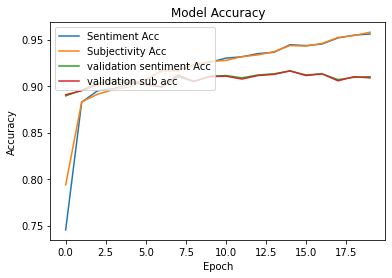

In [ ]:
plt.plot(history.history['dense_6_acc'])
plt.plot(history.history['dense_7_acc'])
plt.plot(history.history['val_dense_6_acc'])
plt.plot(history.history['val_dense_7_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Sentiment Acc', 'Subjectivity Acc','validation sentiment Acc', 'validation sub acc'], loc='upper left')

# plt.savefig("/content/gdrive/My Drive/Multi_Task_Learning/results/Acc_best.png")
plt.show()

In [ ]:
# model_json = model.to_json()
# with open("/content/gdrive/My Drive/Multi_Task_Learning/PangLee/model/model2.json", "w") as json_file:
#     json_file.write(model_json)

In [ ]:
# model.save_weights("/content/gdrive/My Drive/Multi_Task_Learning/PangLee/model/model2.h5")

RuntimeError: ignored

In [ ]:
###Individual model
###

deep_inputs_1 = Input(shape=(maxlen,))
deep_inputs_2 = Input(shape=(maxlen,))

embedding_layer_1 = Embedding(15866, 300, weights=[sentiment_matrix], trainable=False)(deep_inputs_1) #task 1
embedding_layer_2 = Embedding(18644, 300, weights=[subjective_matrix], trainable=False)(deep_inputs_2) #task 2

model_1_LSTM = Bidirectional(LSTM(128,return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(embedding_layer_1) #task 1
model_2_LSTM = Bidirectional(LSTM(128,return_sequences=True,dropout=0.2,recurrent_dropout=0.3))(embedding_layer_2) #task 2

model_1_dense= TimeDistributed(Dense(128,activation='relu',trainable=True))(model_1_LSTM)
model_2_dense=TimeDistributed(Dense(128,activation='relu',trainable=True))(model_2_LSTM)

model_1_dense = Dropout(0.5)(model_1_dense)
model_2_dense = Dropout(0.5)(model_2_dense)

attention_layer_1 = SeqSelfAttention(attention_activation='sigmoid')(model_1_dense)
attention_layer_2 = SeqSelfAttention(attention_activation='sigmoid')(model_2_dense)
# attention_layer=attention()(model_1_dense)

model_12_dense =Dense(12,activation='relu',trainable=True)(attention_layer_1)
model_22_dense =Dense(12,activation='relu',trainable=True)(attention_layer_2)

drop_3 = Dropout(0.5)(model_12_dense)
drop_4 = Dropout(0.5)(model_22_dense)

# flat_1 = Flatten()(model_12_dense)
# flat_2 = Flatten()(model_22_dense)
flat_1 = Flatten()(drop_3)
flat_2 = Flatten()(drop_4)

# ntn_output = NeuralTensorLayer(output_dim=64, input_dim=480)([flat_1,flat_2])

# merged_1 = Concatenate(axis=1)([flat_1, ntn_output])
# merged_2=Concatenate(axis=1)([flat_2, ntn_output])

predictions1 = Dense(2, activation='softmax')(flat_1 ) #change the output number according to the dataset
predictions2 = Dense(2, activation='softmax')(flat_2)

model = Model(inputs=[deep_inputs_1, deep_inputs_2], outputs=[predictions1, predictions2])

opt = Adam(learning_rate=0.0002)
# opt =SGD(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 40, 300)      4759800     input_18[0][0]                   
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 40, 300)      5593200     input_19[0][0]                   
____________________________________________________________________________________________

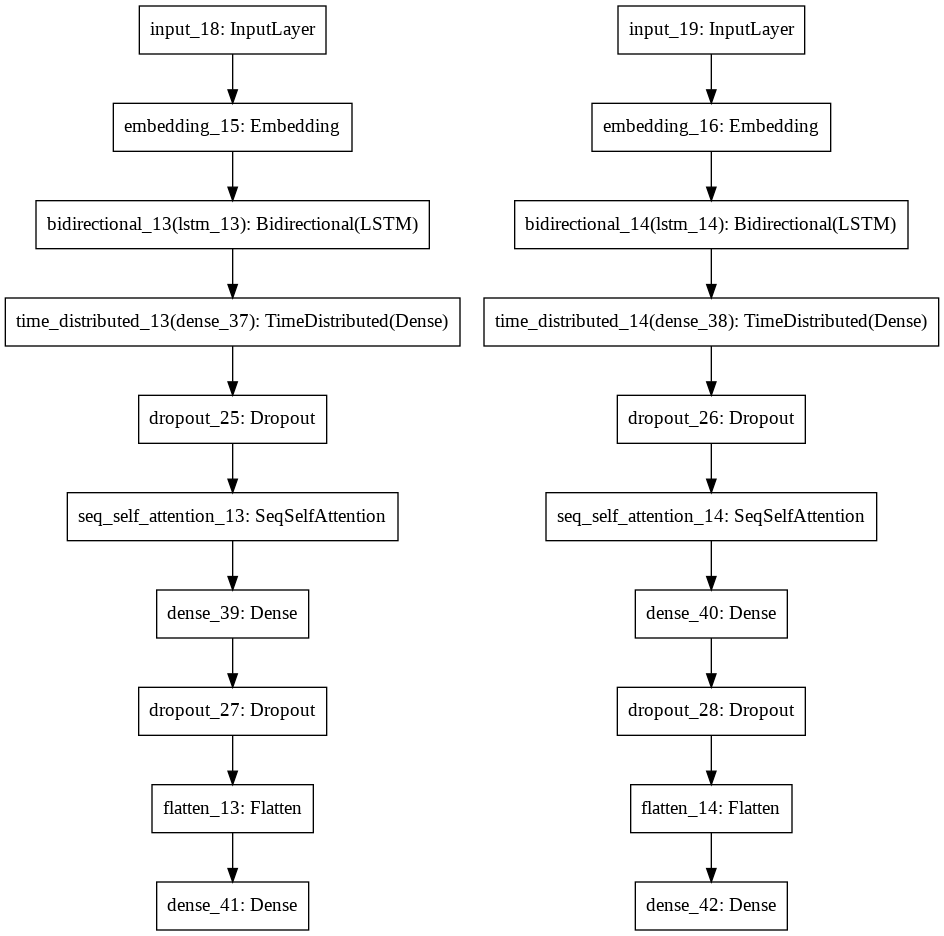

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
history=model.fit([senti_train, sub_train], [sentlabel_train,sublabel_train], batch_size= 34, epochs=20, verbose=1, shuffle=True,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 73s 11ms/step - loss: 1.0211 - dense_41_loss: 0.6163 - dense_42_loss: 0.4040 - dense_41_acc: 0.6639 - dense_42_acc: 0.8275 - val_loss: 0.8607 - val_dense_41_loss: 0.6039 - val_dense_42_loss: 0.2703 - val_dense_41_acc: 0.6944 - val_dense_42_acc: 0.8938
Epoch 2/20
6400/6400 [==============================] - 71s 11ms/step - loss: 0.7891 - dense_41_loss: 0.5128 - dense_42_loss: 0.2751 - dense_41_acc: 0.7530 - dense_42_acc: 0.8889 - val_loss: 0.7984 - val_dense_41_loss: 0.5596 - val_dense_42_loss: 0.2543 - val_dense_41_acc: 0.7275 - val_dense_42_acc: 0.8969
Epoch 3/20
6400/6400 [==============================] - 71s 11ms/step - loss: 0.7432 - dense_41_loss: 0.4832 - dense_42_loss: 0.2587 - dense_41_acc: 0.7598 - dense_42_acc: 0.8945 - val_loss: 0.7560 - val_dense_41_loss: 0.5157 - val_dense_42_loss: 0.2499 - val_dense_41_acc: 0.7412 - val_dense_42_acc: 0.8975
Epoch 4/20
6400/6400 [======

In [ ]:
score = model.evaluate([senti_test, sub_test], [sentlabel_test,sublabel_test], verbose=1)
score

2000/2000 [==============================] - 6s 3ms/step


[0.8881121826171875,
 0.6306765675544739,
 0.25533032417297363,
 0.7595000267028809,
 0.9075000286102295]